In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
#show the content of the file DATA.csv
df = pd.read_csv("data_NDX_2025-04-15.csv")  # con colonne X, Y, Z
print(df.head())
#convert the EXPIR_DATE as time to maturity making the difference between the today date and the input date
df['EXPIR_DATE'] = pd.to_datetime(df['EXPIR_DATE'], format='%Y-%m-%d') #subtract the current date from the expiration date
today = pd.to_datetime('2025-04-16')  # replace with the current date
df['Time to maturity'] = (df['EXPIR_DATE'] - today).dt.days # convert to days
#remove the data from the 600 days
df = df[df['Time to maturity'] <= 600]
print(df.head())


         Instrument  EXPIR_DATE  PUT_CALL  STRIKE_PRC  CF_BID   CF_ASK  \
0  /NDXd1725A2500.U  2025-04-17         5       12500  6239.3  6430.50   
1  /NDXp1725A2500.U  2025-04-17         6       12500     0.0     0.05   
2  /NDXd1725A2600.U  2025-04-17         5       12600  6138.3  6330.50   
3  /NDXp1725A2600.U  2025-04-17         6       12600     0.0     0.05   
4  /NDXd1725A2700.U  2025-04-17         5       12700  6032.0  6230.60   

   IMP_VOLT   DELTA  GAMMA     RHO   THETA    VEGA  
0  179.4069  0.9974    0.0  0.8951 -5.1824  0.1278  
1  129.1750  0.0000    0.0  0.0000 -0.0794  0.0024  
2  172.0583  0.9978    0.0  0.9029 -4.3389  0.1283  
3  127.3543  0.0000    0.0  0.0000 -0.0794  0.0024  
4  151.9341  0.9992    0.0  0.9120 -2.0899  0.0552  
         Instrument EXPIR_DATE  PUT_CALL  STRIKE_PRC  CF_BID   CF_ASK  \
0  /NDXd1725A2500.U 2025-04-17         5       12500  6239.3  6430.50   
1  /NDXp1725A2500.U 2025-04-17         6       12500     0.0     0.05   
2  /NDXd1725A2600.

In [4]:
#divide between call and put options (call = 5, put = 6)
df_call = df[df['PUT_CALL'] == 5]
df_put = df[df['PUT_CALL'] == 6]
print(df_call.head())


         Instrument EXPIR_DATE  PUT_CALL  STRIKE_PRC  CF_BID  CF_ASK  \
0  /NDXd1725A2500.U 2025-04-17         5       12500  6239.3  6430.5   
2  /NDXd1725A2600.U 2025-04-17         5       12600  6138.3  6330.5   
4  /NDXd1725A2700.U 2025-04-17         5       12700  6032.0  6230.6   
6  /NDXd1725A2800.U 2025-04-17         5       12800  5939.5  6130.7   
8  /NDXd1725A2900.U 2025-04-17         5       12900  5837.2  6030.7   

   IMP_VOLT   DELTA  GAMMA     RHO   THETA    VEGA  Time to maturity  
0  179.4069  0.9974    0.0  0.8951 -5.1824  0.1278                 1  
2  172.0583  0.9978    0.0  0.9029 -4.3389  0.1283                 1  
4  151.9341  0.9992    0.0  0.9120 -2.0899  0.0552                 1  
6  170.6785  0.9971    0.0  0.9163 -5.3596  0.1294                 1  
8  158.4454  0.9983    0.0  0.9251 -3.4805  0.1298                 1  


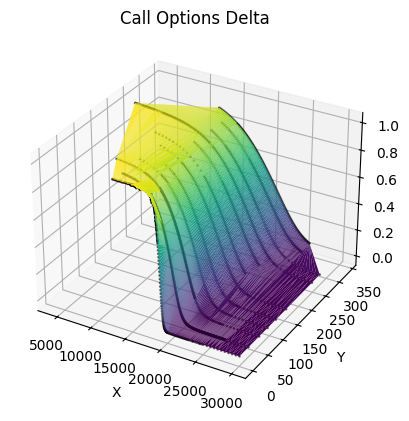

In [5]:
#create a 3d plot of the survase of the Delta (Z axis) of the call options having as X axis the strike price and as Y axis the time to maturity

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#improve the view of the plot by using different colours in the scatter
ax.scatter(df_call["STRIKE_PRC"], df_call['Time to maturity'], df_call['DELTA'], c='black', alpha=0.5, s=1)
#use trisurface to create a surface plot 
ax.plot_trisurf(df_call["STRIKE_PRC"], df_call['Time to maturity'], df_call['DELTA'], cmap='viridis', edgecolor='none', alpha=1)

#ax.scatter(df_call["STRIKE_PRC"], df_call['Time to maturity'], df_call['DELTA'])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#show the plot
plt.title("Call Options Delta")
plt.show()


In [10]:
impvol_grid = df_call.pivot_table(columns='STRIKE_PRC', index='Time to maturity', values='IMP_VOLT')
print(impvol_grid)
#download the grid as csv
impvol_grid.to_csv('impvol_grid.csv')


STRIKE_PRC           4000      4200     4400     4600     4800     5000   \
Time to maturity                                                           
1                      NaN       NaN      NaN      NaN      NaN      NaN   
30                     NaN       NaN      NaN      NaN      NaN      NaN   
65                     NaN       NaN      NaN      NaN      NaN      NaN   
93                     NaN       NaN      NaN      NaN      NaN      NaN   
121                    NaN       NaN      NaN      NaN      NaN      NaN   
156                    NaN       NaN      NaN      NaN      NaN      NaN   
184                    NaN       NaN      NaN      NaN      NaN      NaN   
219                    NaN       NaN      NaN      NaN      NaN      NaN   
247               105.1387  102.1825  99.4657  97.0394  94.4261  92.3168   
275                    NaN       NaN      NaN      NaN      NaN      NaN   
310                    NaN       NaN      NaN      NaN      NaN      NaN   
338         

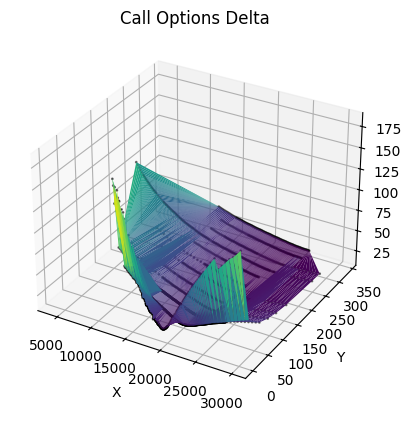

In [ ]:
#create a 3d plot of the survase of the Delta (Z axis) of the call options having as X axis the strike price and as Y axis the time to maturity

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#improve the view of the plot by using different colours in the scatter
ax.scatter(df_call["STRIKE_PRC"], df_call['Time to maturity'], df_call['IMP_VOLT'], c='black', alpha=0.5, s=1)
#use trisurface to create a surface plot 
ax.plot_trisurf(df_call["STRIKE_PRC"], df_call['Time to maturity'], df_call['IMP_VOLT'], cmap='viridis', edgecolor='none', alpha=1)


#ax.scatter(df_call["STRIKE_PRC"], df_call['Time to maturity'], df_call['DELTA'])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#show the plot
plt.title("Call Options Delta")
plt.show()
impvol_grid = df_call.pivot_table(columns='STRIKE_PRC', index='Time to maturity', values='IMP_VOLT')


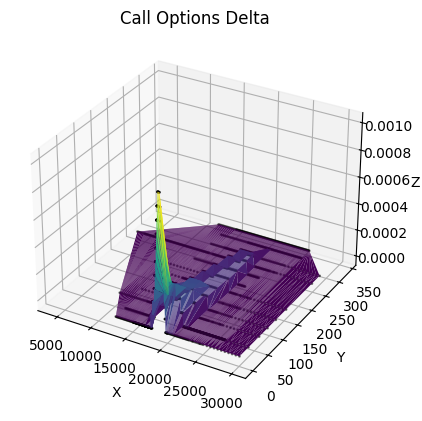

In [7]:
#create a 3d plot of the survase of the Delta (Z axis) of the call options having as X axis the strike price and as Y axis the time to maturity

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#improve the view of the plot by using different colours in the scatter
ax.scatter(df_call["STRIKE_PRC"], df_call['Time to maturity'], df_call['GAMMA'], c='black', alpha=0.5, s=1)
#use trisurface to create a surface plot 
ax.plot_trisurf(df_call["STRIKE_PRC"], df_call['Time to maturity'], df_call['GAMMA'], cmap='viridis', edgecolor='none', alpha=1)


#ax.scatter(df_call["STRIKE_PRC"], df_call['Time to maturity'], df_call['DELTA'])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#show the plot
plt.title("Call Options Delta")
plt.show()


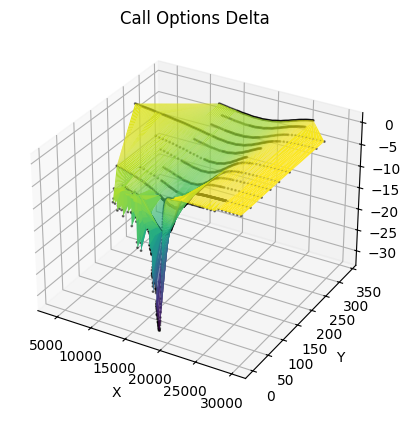

In [8]:
#create a 3d plot of the survase of the Delta (Z axis) of the call options having as X axis the strike price and as Y axis the time to maturity

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#improve the view of the plot by using different colours in the scatter
ax.scatter(df_call["STRIKE_PRC"], df_call['Time to maturity'], df_call['THETA'], c='black', alpha=0.5, s=1)
#use trisurface to create a surface plot 
ax.plot_trisurf(df_call["STRIKE_PRC"], df_call['Time to maturity'], df_call['THETA'], cmap='viridis', edgecolor='none', alpha=1)


#ax.scatter(df_call["STRIKE_PRC"], df_call['Time to maturity'], df_call['DELTA'])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#show the plot
plt.title("Call Options Delta")
plt.show()


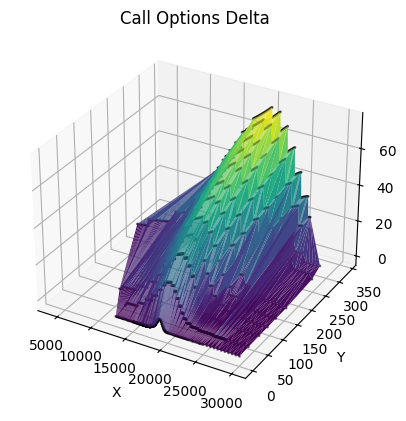

In [9]:
#create a 3d plot of the survase of the Delta (Z axis) of the call options having as X axis the strike price and as Y axis the time to maturity

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#improve the view of the plot by using different colours in the scatter
ax.scatter(df_call["STRIKE_PRC"], df_call['Time to maturity'], df_call['VEGA'], c='black', alpha=0.5, s=1)
#use trisurface to create a surface plot 
ax.plot_trisurf(df_call["STRIKE_PRC"], df_call['Time to maturity'], df_call['VEGA'], cmap='viridis', edgecolor='none', alpha=1)


#ax.scatter(df_call["STRIKE_PRC"], df_call['Time to maturity'], df_call['DELTA'])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#show the plot
plt.title("Call Options Delta")
plt.show()
